There are 50,000 + records in our dataset. We want to cut into a specific area of the data and perform a more in depth analysis. Idealy we want to use the date however we are runninng into issues with this. For the moment we will just use to raw index to do so. We can investigate a specific section of the data based on previous alert frequency visualization.

In [1]:
# import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from statsmodels.graphics.tsaplots import plot_acf # autocorrealtion function 

### FEATURE ENGINEERING

In [2]:
#Create Dataframe from CSV file & parse dates
data = pd.read_excel('DataDecodedPrepared (1).xlsx', parse_dates = True)

#create copy of orginal dataframe
data_copy = data.copy(deep = True)

# drop column
data.drop(data.columns[[6]], axis=1, inplace=True)

# strng strip (remove part of string)
data['Milliseconds'] = data['Milliseconds'].str.rstrip('ms')
# remove white space
data['Client'] = data['Client'].str.strip()
data['EngineNode'] = data['EngineNode'].str.strip()

#covert 'Date' column object to datetime object
#data['Date'] = pd.to_datetime(data['Date'])

# data type conversion
data['Milliseconds'] = data['Milliseconds'].astype('int64')

# new column milliseconds conversion to seconds
data['Seconds'] = data['Milliseconds']/1000

# new column seconds conversion to minutes
data['Minutes'] = data['Milliseconds']/60000

# new column include log alert
data['AlertFrequency'] = data.index + 1 #  dataframe index, integer numbers or string values, column labels(column names), usually strings 

In [3]:
data.head()

,Date,Host,Service,EngineNode,Client,RequestSize(TB),Seconds,Milliseconds,Minutes,AlertFrequency
0,2021-06-07T15:42:35.251Z,"""ExporterFunctionType""","""AzureTaskType_1_Logs""",engine75,Wallmart,5,22.555,22555,0.375917,1
1,2021-06-07T15:39:17.336Z,"""ExporterFunctionType""","""AzureTaskType_1_Logs""",engine1,Wallmart,2,5.110,5110,0.085167,2
2,2021-06-07T15:39:16.472Z,"""ExporterFunctionType""","""AzureTaskType_1_Logs""",engine6,Saudi Aramco,5,5.816,5816,0.096933,3
3,2021-06-07T15:33:21.699Z,"""ExporterFunctionType""","""AzureTaskType_1_Logs""",engine3,State Grid Corporation of China,12,22.475,22475,0.374583,4
4,2021-06-07T15:24:09.251Z,"""ExporterFunctionType""","""AzureTaskType_1_Logs""",engine4,Wallmart,4,22.521,22521,0.375350,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51168 entries, 0 to 51167
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             51168 non-null  object 
 1   Host             51168 non-null  object 
 2   Service          51168 non-null  object 
 3   EngineNode       51168 non-null  object 
 4   Client           51168 non-null  object 
 5   RequestSize(TB)  51168 non-null  int64  
 6   Seconds          51168 non-null  float64
 7   Milliseconds     51168 non-null  int64  
 8   Minutes          51168 non-null  float64
 9   AlertFrequency   51168 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 3.9+ MB


#### Handling Dates
- Pandas DateTime column is pandas object [2021-06-07T15:42:35.251Z	]
- We need to split the date and time
- Use pandas str.split function to split these (within pandas column)
- Create a new dataframe (metadata) to hold dates 
- Convert to lists and convert to datetime object
- Append metadata to dataframe and set as index
- We need to isolate in reverse order data.loc['2021-06-07':'2021-06-01']

To isolate by Date (try not convetting to datetime object before setting column as index)

In [ ]:
data['Date'] = data['Date'].str.split('T') # split pandas dataframe column based on sring value
metadata = pd.DataFrame(data['Date'].to_list(), columns=['DATE','TIME']) # create new df and convert 
data['DATE'] = metadata['DATE'] # save metadata df column to orig df
data = data.set_index(data['DATE']) # set df index

In [6]:
metadata.head()

,DATE,TIME
0,2021-06-07,15:42:35.251Z
1,2021-06-07,15:39:17.336Z
2,2021-06-07,15:39:16.472Z
3,2021-06-07,15:33:21.699Z
4,2021-06-07,15:24:09.251Z


### ISOLATE TIME SERIES DATA FOR IN DEPTH ANALYSIS
- Isolate dataset based on dates
- Compute the diff() & pct change() over Seconds variable

In [50]:
analysis = data.loc['2021-05-28':'2021-05-26'] # .iloc (isolate/subset via date)

#Computing the percentage changes and difference via pandas methods
analysis['pct_change_Seconds'] = analysis['Seconds'].pct_change()
analysis['diff_Seconds'] = analysis['Seconds'].diff()

analysis.head()

C:\Users\dwatters\AppData\Local\Temp\ipykernel_15220\3635266187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['pct_change_Seconds'] = analysis['Seconds'].pct_change()
C:\Users\dwatters\AppData\Local\Temp\ipykernel_15220\3635266187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['diff_Seconds'] = analysis['Seconds'].diff()


,Date,Host,Service,EngineNode,Client,RequestSize(TB),Seconds,Milliseconds,Minutes,AlertFrequency,DATE,pct_change_Seconds,diff_Seconds
DATE,,,,,,,,,,,,,
2021-05-28,"[2021-05-28, 23:58:44.296Z]","""ExporterFunctionType""","""AzureTaskType_1_Logs""",engine1,Wallmart,14,5.199,5199,0.086650,24449,2021-05-28,NaN,NaN
2021-05-28,"[2021-05-28, 23:57:52.124Z]","""ExporterFunctionType""","""AzureTaskType_1_Logs""",engine61,State Grid Corporation of China,11,5.492,5492,0.091533,24450,2021-05-28,0.056357,0.293
2021-05-28,"[2021-05-28, 23:57:28.710Z]","""ExporterFunctionType""","""AzureTaskType_1_Logs""",engine0,State Grid Corporation of China,11,5.736,5736,0.095600,24451,2021-05-28,0.044428,0.244
2021-05-28,"[2021-05-28, 23:57:19.922Z]","""ExporterFunctionType""","""AzureTaskType_1_Logs""",engine21,Wallmart,15,6.031,6031,0.100517,24452,2021-05-28,0.051430,0.295
2021-05-28,"[2021-05-28, 23:56:28.830Z]","""ExporterFunctionType""","""AzureTaskType_1_Logs""",engine14,Wallmart,15,5.195,5195,0.086583,24453,2021-05-28,-0.138617,-0.836


### DATA VISUALIZATION

#### Quantitative Analysis

C:\Users\dwatters\AppData\Local\Temp\ipykernel_15220\1570452958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(analysis['Seconds'],kde = True, hist = True, color = 'r')


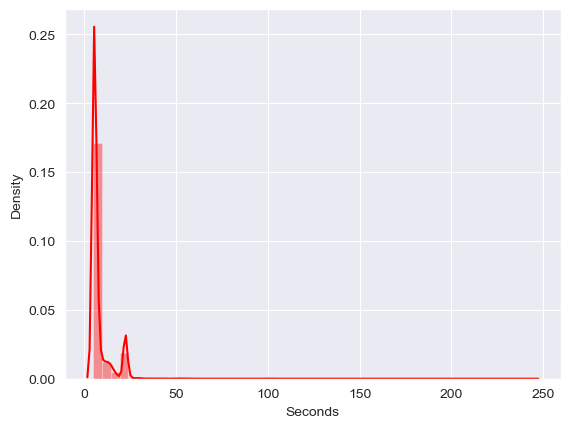

In [38]:
sns.distplot(analysis['Seconds'],kde = True, hist = True, color = 'r')
sns.set_style('darkgrid')
plt.show()

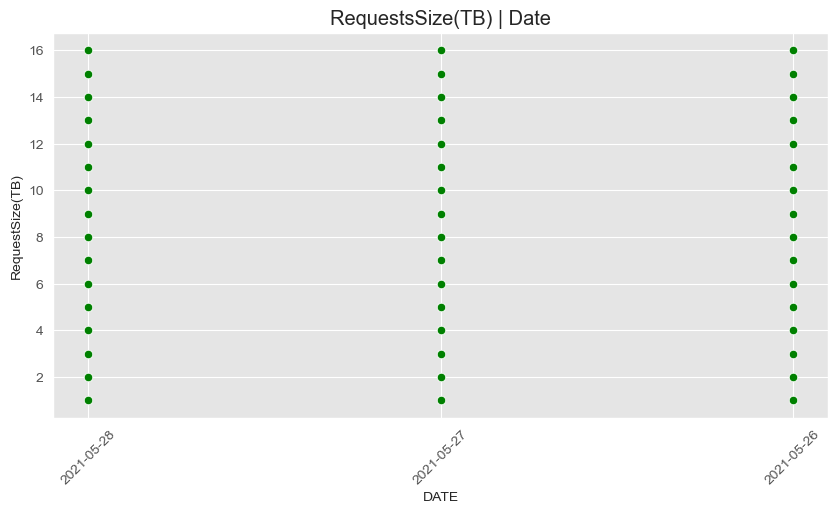

In [49]:
fig = plt.figure(figsize=(10,5))
plt.style.use("ggplot")
sns.scatterplot(x = analysis.index, y = analysis['RequestSize(TB)'], data = analysis, color='g')
plt.title("RequestsSize(TB) | Date")
plt.xticks(rotation=45)
plt.show()

#### Qualitative Analysis

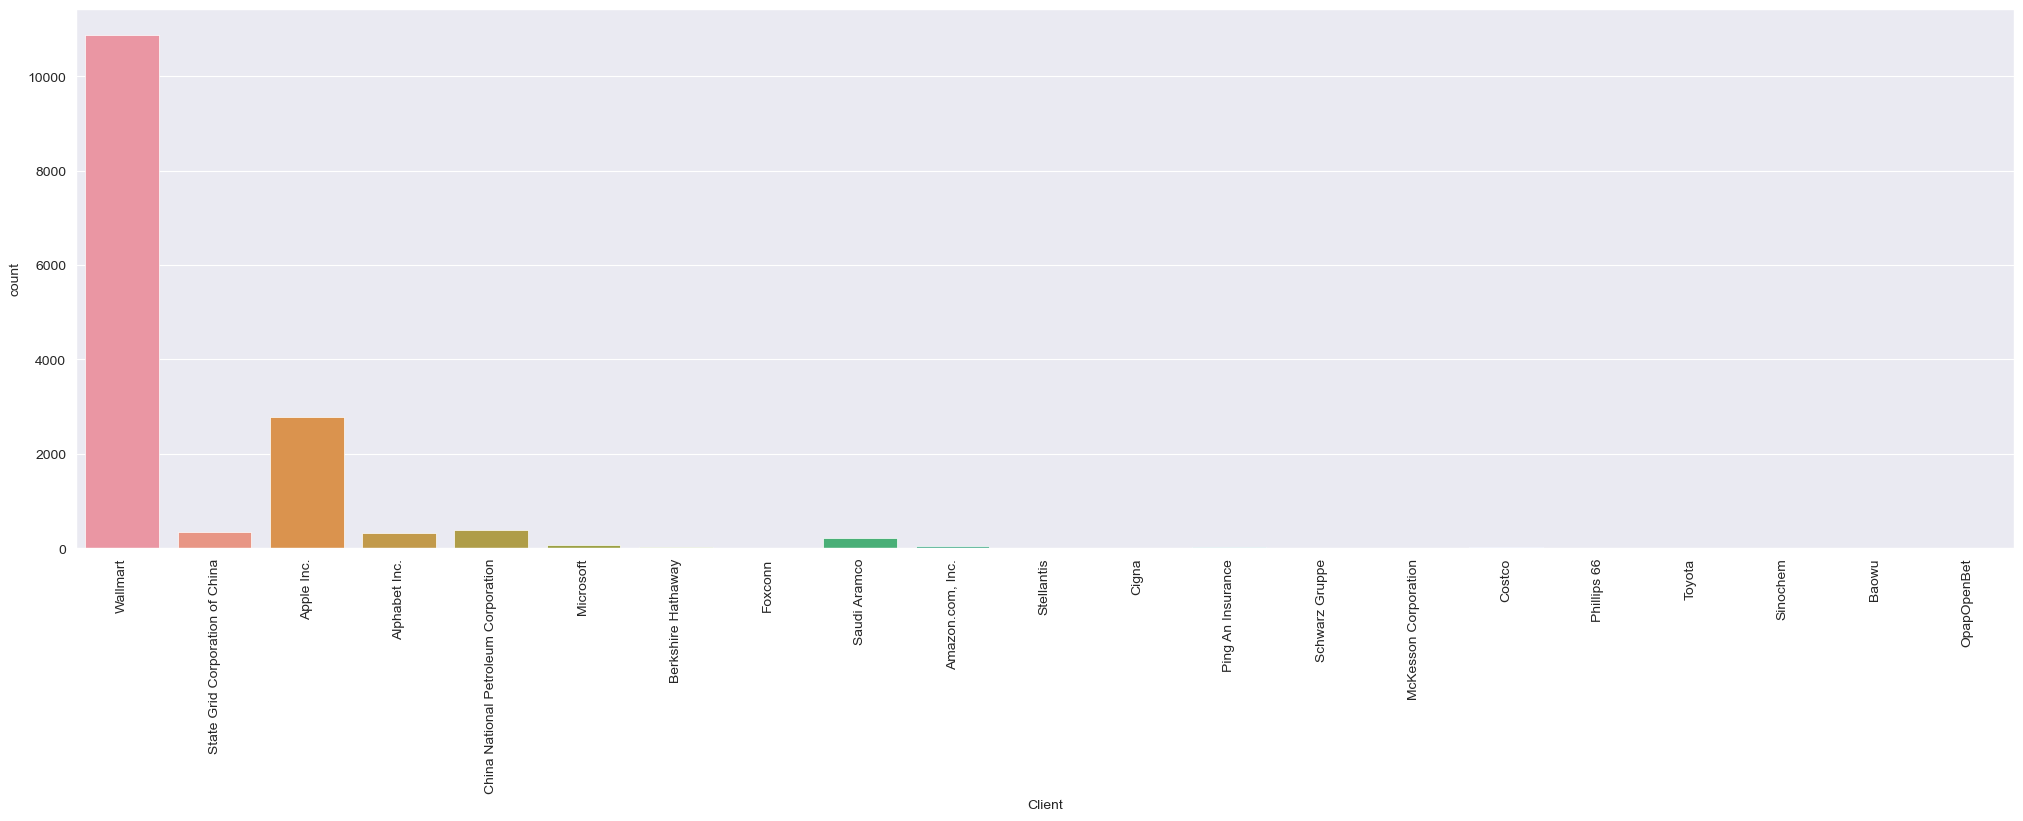

Wallmart                                10877
Apple Inc.                               2779
China National Petroleum Corporation      377
State Grid Corporation of China           346
Alphabet Inc.                             329
Saudi Aramco                              221
Microsoft                                  62
Amazon.com, Inc.                           46
Berkshire Hathaway                         36
Ping An Insurance                          26
Name: Client, dtype: int64

In [40]:
plt.figure(figsize=(25,7))
sns.set_style('darkgrid')
sns.countplot(x = analysis['Client'], data = analysis)
plt.xticks(rotation = 90)
plt.show ()
#
display(analysis['Client'].value_counts().head(10))

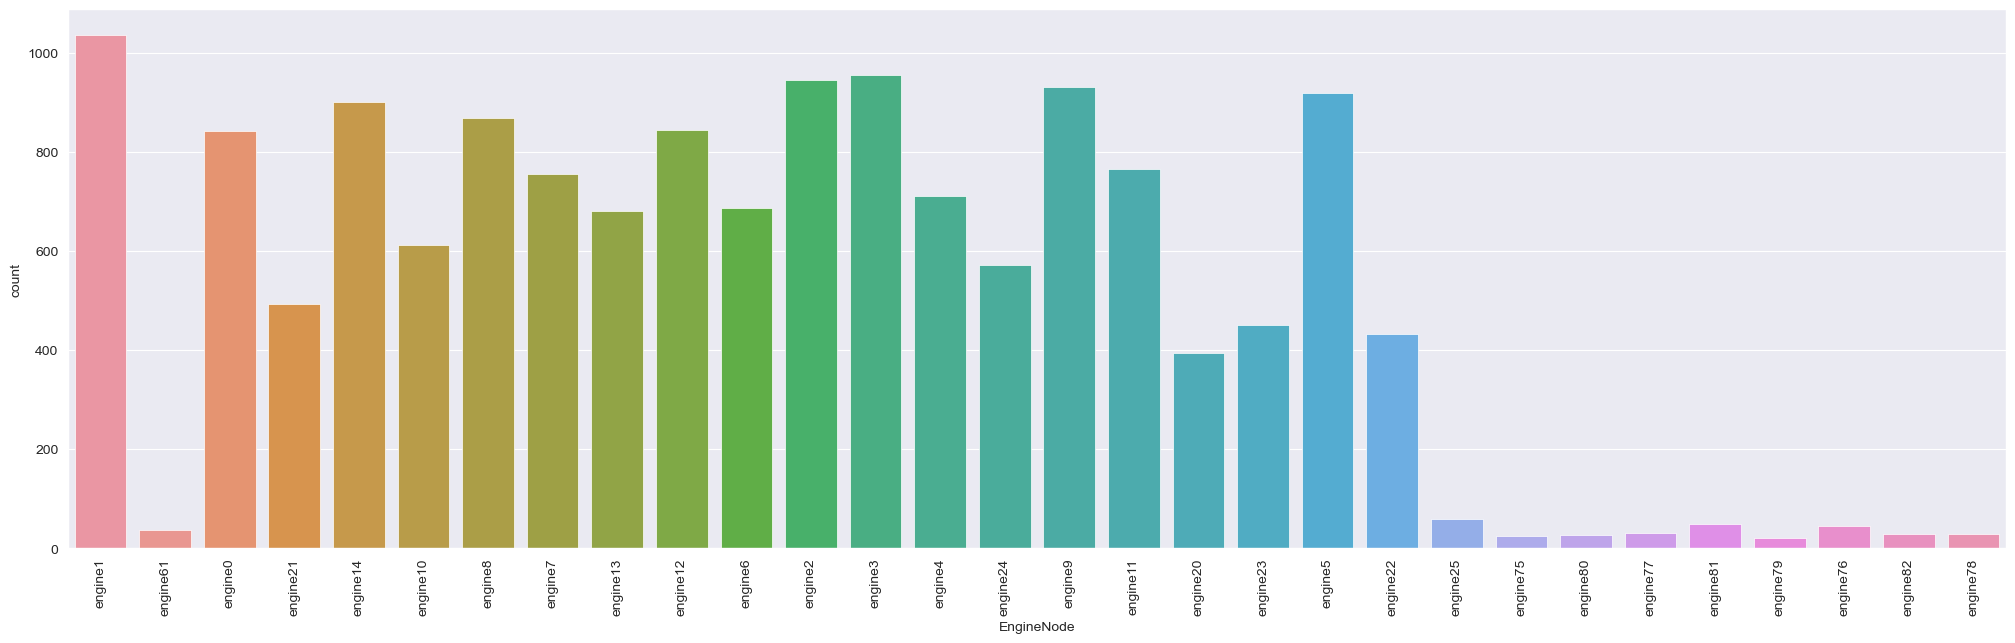

engine1     1037
engine3      956
engine2      947
engine9      931
engine5      920
engine14     901
engine8      870
engine12     846
engine0      844
engine11     767
Name: EngineNode, dtype: int64

In [41]:
plt.figure(figsize=(25,7))
sns.set_style('darkgrid')
sns.countplot(x = analysis['EngineNode'], data = analysis)
plt.xticks(rotation = 90)
plt.show ()
#
display(analysis['EngineNode'].value_counts().head(10))

#### Autocorrelation Analysis

Autocorrelation, also termed as serial correlation, refers to the degree of CORRELATION of the same feature between two successive time intervals. Similarily to correlation the value of autocorrelation ranges from -1 to 1. A value between -1 and 0 represents negative autocorrelation. A value between 0 and 1 represents positive autocorrelation.

Autocorrelation gives information about the trend within historical the data. Autocorrelation analysis measures the relationship of the observations between the different points in time, and thus seeks for a pattern or trend over the time series.

This is a useful tool for time series data analysis.

In [42]:
# Compute Autocorrelations
autocorrelationx = analysis['Seconds'].autocorr()
print('The autocorrelation of X pct change is:', autocorrelationx)

The autocorrelation of X pct change is: 0.5384559607675014


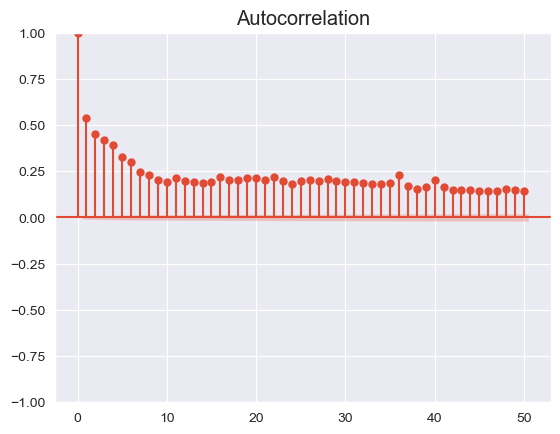

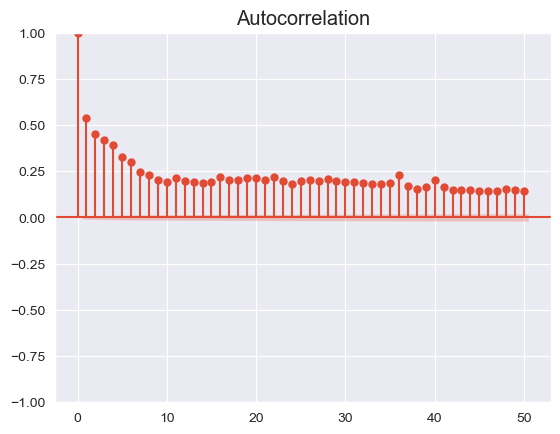

In [43]:
# autocorrelation function
plot_acf(analysis['Seconds'], lags = 50, alpha = 0.3)